# Task 3 - Prodigy Infotech Data Science Internship
# Build a Decision Tree Classifier using the UCI Bank Marketing dataset

# Step 1: Import Libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Enable inline plots (for Jupyter)
%matplotlib inline

# Step 2: Load Dataset
# Make sure 'bank-additional.csv' is in your working directory

In [5]:
df = pd.read_csv("bank-additional.csv", sep=';')

# Step 3: Explore Dataset

In [6]:
print("First 5 rows:")
print(df.head())

print("\nDataset Info:")
print(df.info())

print("\nSummary Statistics:")
print(df.describe(include='all'))

First 5 rows:
   age          job  marital          education default  housing     loan  \
0   30  blue-collar  married           basic.9y      no      yes       no   
1   39     services   single        high.school      no       no       no   
2   25     services  married        high.school      no      yes       no   
3   38     services  married           basic.9y      no  unknown  unknown   
4   47       admin.  married  university.degree      no      yes       no   

     contact month day_of_week  ...  campaign  pdays  previous     poutcome  \
0   cellular   may         fri  ...         2    999         0  nonexistent   
1  telephone   may         fri  ...         4    999         0  nonexistent   
2  telephone   jun         wed  ...         1    999         0  nonexistent   
3  telephone   jun         fri  ...         3    999         0  nonexistent   
4   cellular   nov         mon  ...         1    999         0  nonexistent   

  emp.var.rate  cons.price.idx  cons.conf.idx  e

# Step 4: Handle Missing Values

In [7]:
print("\nMissing Values in Each Column:")
print(df.isnull().sum())


Missing Values in Each Column:
age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64


# Step 5: Encode Categorical Variables

In [8]:
le = LabelEncoder()
for col in df.select_dtypes(include=["object"]).columns:
    df[col] = le.fit_transform(df[col])

# Step 6: Define Features and Target

In [9]:
X = df.drop("y", axis=1)  # Features
y = df["y"]               # Target (subscription: yes/no)

# Step 7: Split Data for Training and Testing

In [10]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# Step 8: Train Decision Tree Classifier

In [11]:
clf = DecisionTreeClassifier(max_depth=5, random_state=42)
clf.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,5
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


# Step 9: Make Predictions

In [12]:
y_pred = clf.predict(X_test)

# Step 10: Evaluate Model


Accuracy Score: 0.9053398058252428

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.94      0.95       732
           1       0.57      0.64      0.60        92

    accuracy                           0.91       824
   macro avg       0.76      0.79      0.77       824
weighted avg       0.91      0.91      0.91       824


Confusion Matrix:


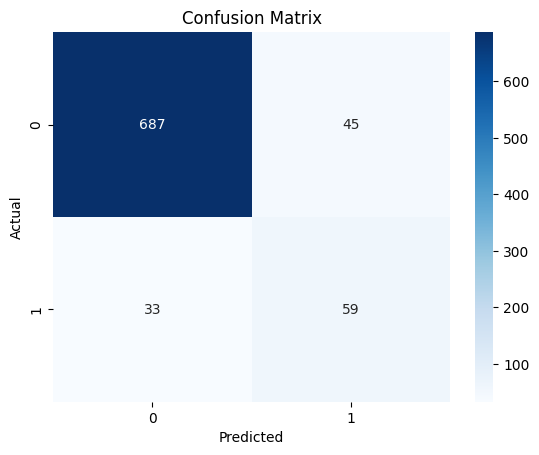

In [13]:
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Step 11: Visualize the Decision Tree

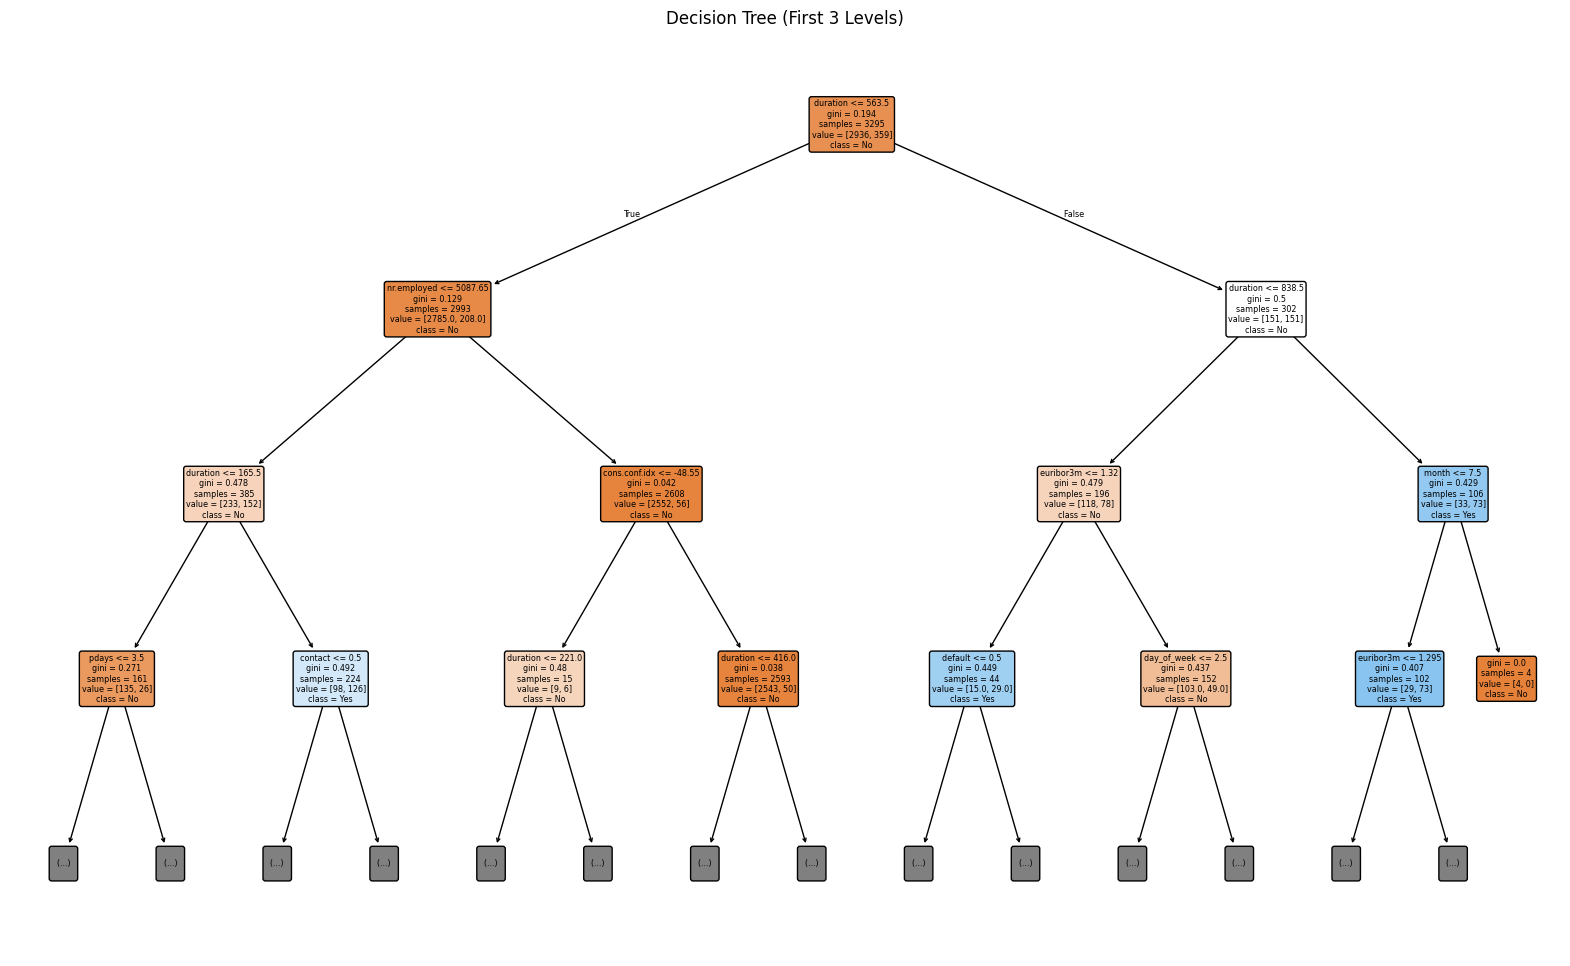

In [14]:
plt.figure(figsize=(20, 12))
plot_tree(clf, feature_names=X.columns, class_names=["No", "Yes"],
          filled=True, rounded=True, max_depth=3)
plt.title("Decision Tree (First 3 Levels)")
plt.show()